**Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

**Loading the dataset**

In [6]:
column = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
#loading the data
df=pd.read_csv('Iris.csv',names=column,skiprows=1)
df.head(150)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


**Description of the data**

In [7]:
df.describe()


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Plotting using seaborn**

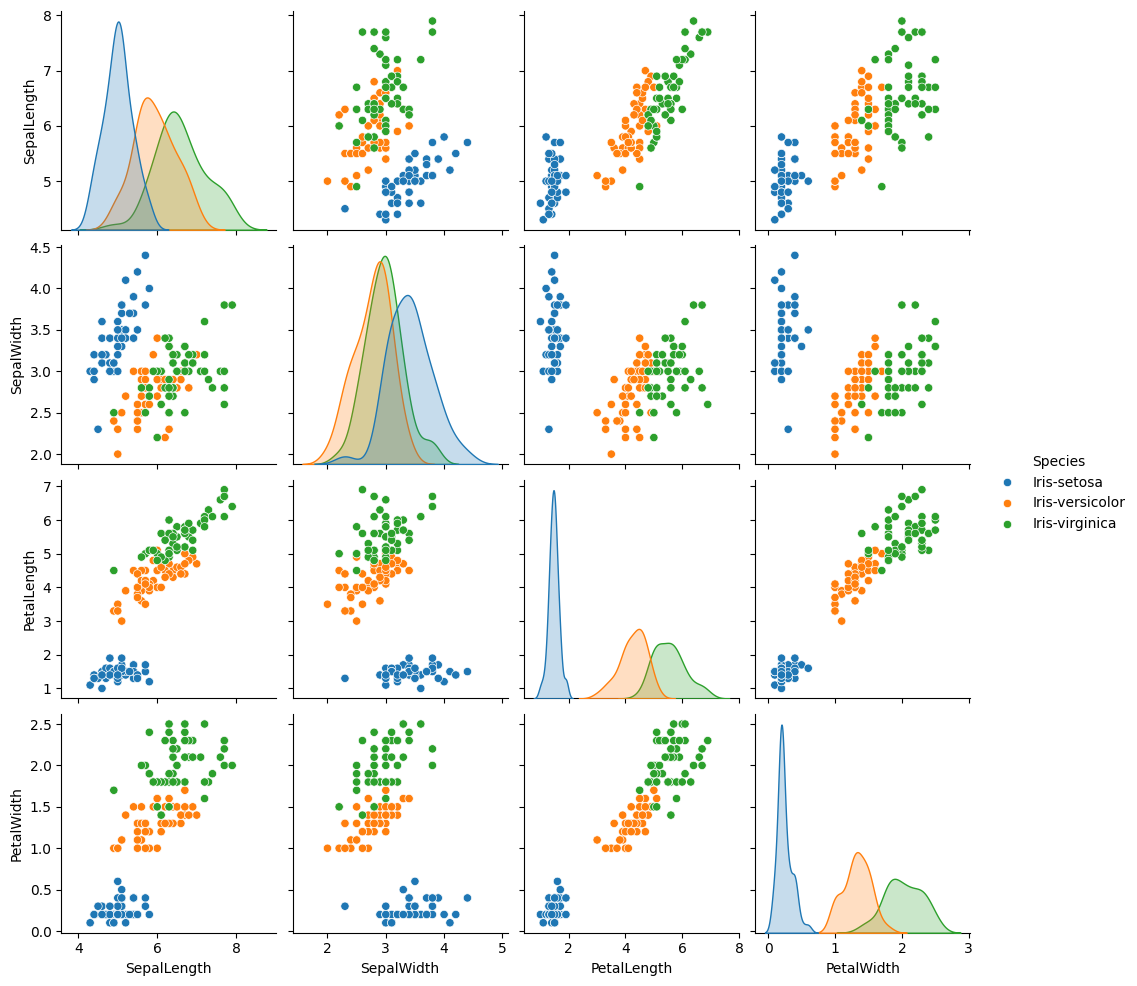

In [8]:
sns.pairplot(df,hue='Species')

**Preprocessing (checking if the data have any null values)**

In [10]:
df.isnull().sum()

,0
SepalLength,0
SepalWidth,0
PetalLength,0
PetalWidth,0
Species,0


**Displaying the analysis using histogram**

<Axes: >

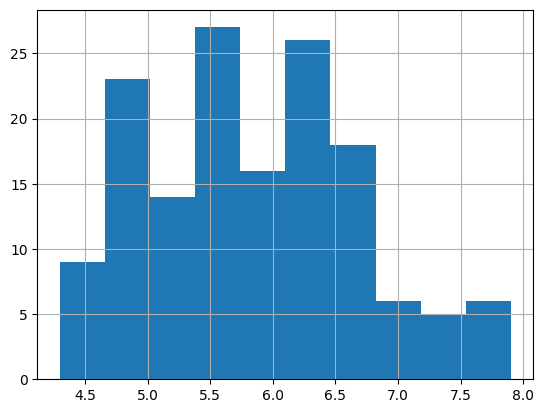

In [11]:
df['SepalLength'].hist()

<Axes: >

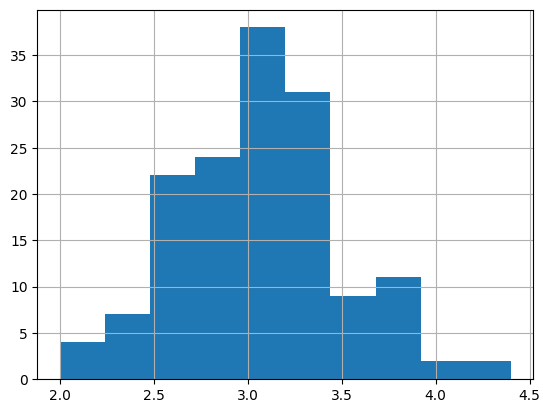

In [12]:
df['SepalWidth'].hist()

<Axes: >

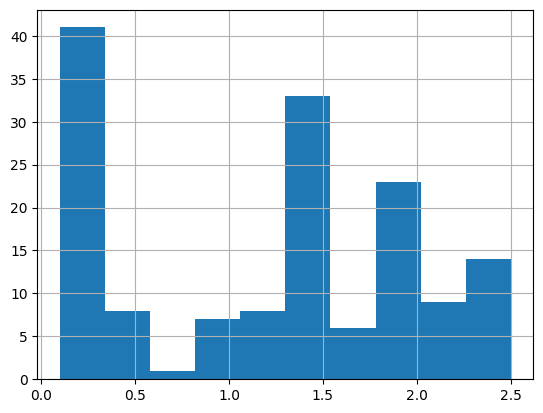

In [13]:
df['PetalWidth'].hist()

<Axes: >

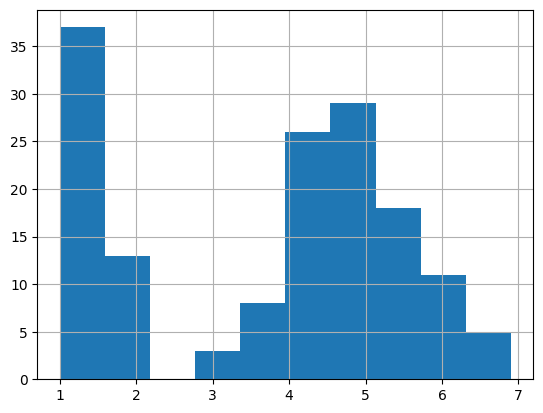

In [14]:
df['PetalLength'].hist()

In [16]:
df.drop('Species', axis=1)

,SepalLength,SepalWidth,PetalLength,PetalWidth
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [17]:
df.corr()

ValueError: could not convert string to float: 'Iris-setosa'

**Correlation Matrix**

In [18]:
df.drop('Species',axis=1).corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<Axes: >

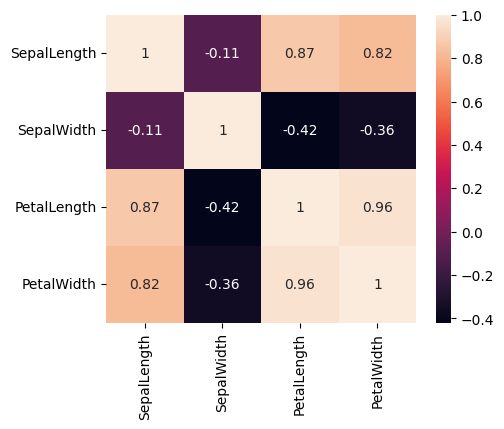

In [21]:
corr = df.drop('Species', axis=1).corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

**Label Encoder**

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


**Model Trainig**

In [42]:
from sklearn.model_selection import train_test_split
X=df.drop('Species',axis=1)
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

**Using linear regression**

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [44]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.0290337496094


**Using KNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


**Using decision tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  91.11111111111111
